In [46]:
import pims
import trackpy as tp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rc('figure',  figsize=(10, 10))
mpl.rc('image', cmap='gray')

In [54]:
frames = pims.open('./jpg_output/_noise_added_0_1*.jpg')

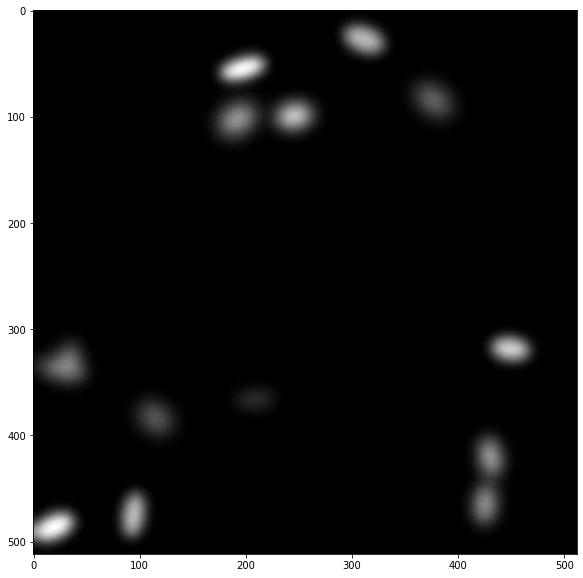

In [55]:
plt.imshow(frames[0])
plt.show()

In [56]:
f = tp.locate(frames[0], 35, invert=False)
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,27.143971,311.048595,24724.851290,10.022621,0.262545,54.878117,64488.0,0.000028,0
1,54.300291,197.719467,31532.965894,9.901600,0.379132,82.317175,79975.0,0.000023,0
2,84.721739,376.788244,11576.700138,10.176855,0.143041,25.824996,33681.0,0.000054,0
3,99.121808,245.715637,22555.551616,9.549424,0.142699,59.720304,63297.0,0.000029,0
4,102.367243,191.793777,17275.308345,9.997291,0.111572,40.997181,52961.0,0.000034,0


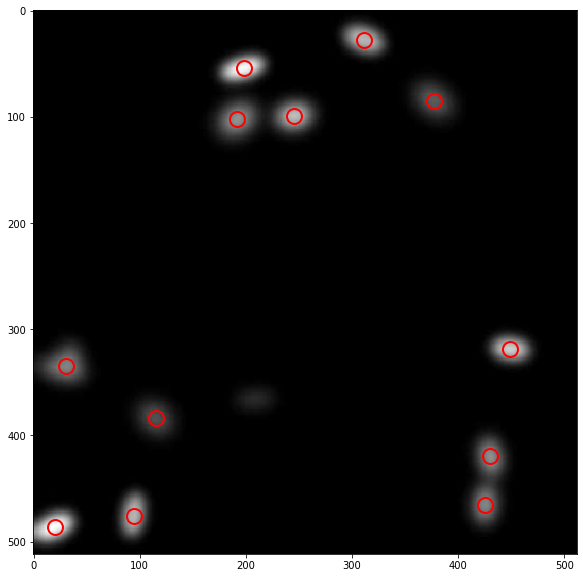

In [57]:
tp.annotate(f, frames[0]);

In [58]:
f = tp.batch(frames, 35, invert=False)

Frame 49: 6 features


In [59]:
t = tp.link(f, 35, memory=3)

Frame 49: 6 trajectories present.


In [60]:
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,27.143971,311.048595,24724.851290,10.022621,0.262545,54.878117,64488.0,0.000028,0,0
11,485.791812,20.172678,31154.306888,9.718184,0.290188,79.089051,86234.0,0.000021,0,1
10,475.492910,94.090712,23561.758027,9.906406,0.343035,59.074679,59322.0,0.000031,0,2
9,465.699642,425.009412,15399.122377,9.505190,0.198560,41.965619,43805.0,0.000042,0,3
7,383.740845,114.987598,10463.319993,10.094259,0.095156,23.565309,29396.0,0.000062,0,4


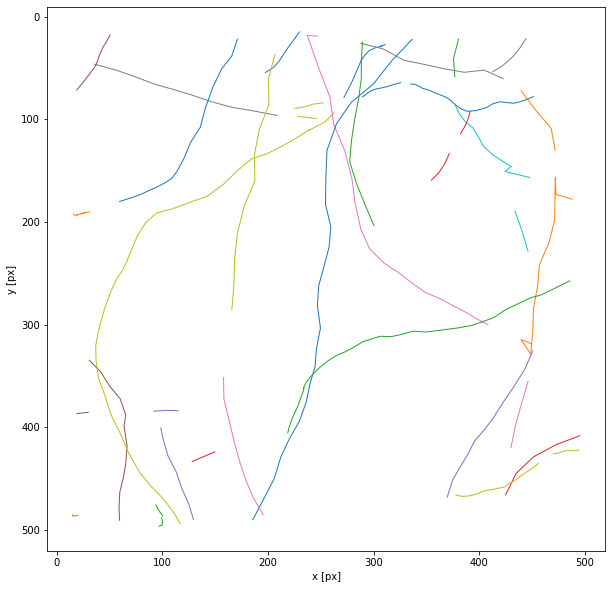

In [61]:
plt.figure()
tp.plot_traj(t);

In [62]:
t1 = tp.filter_stubs(t, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 33
After: 3


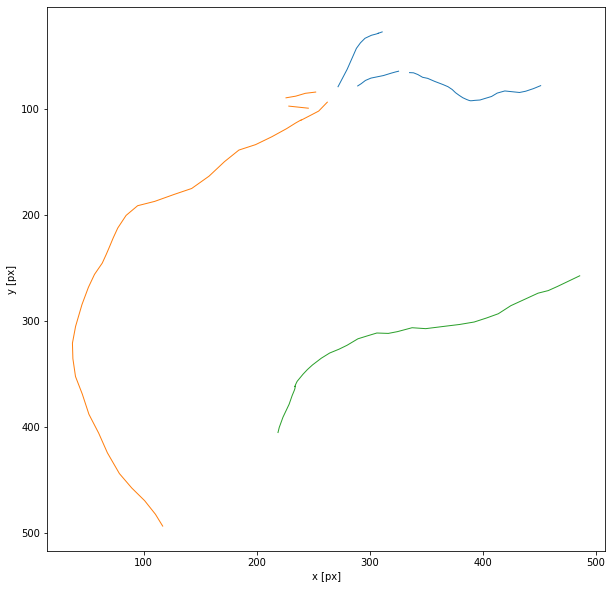

In [63]:
plt.figure()
tp.plot_traj(t1);

In [64]:
t2 = t1[((t1['mass'] > 50) & (t1['size'] < 10) &
         (t1['ecc'] < 0.3))]

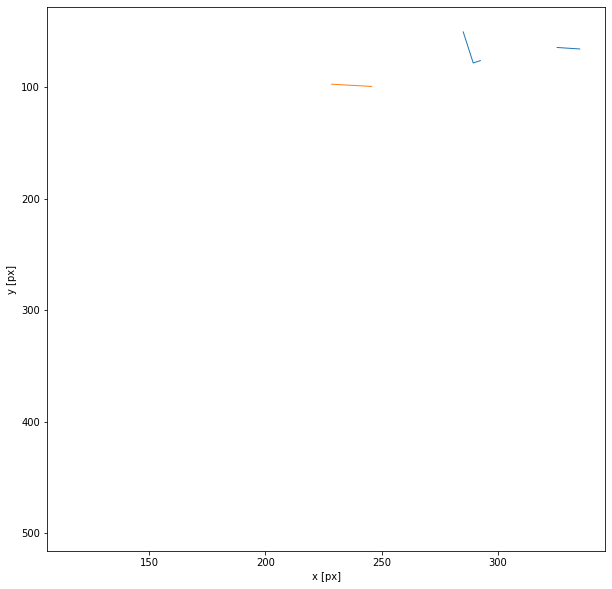

In [65]:
plt.figure()
tp.plot_traj(t2);

In [66]:
t_read = pd.read_csv('tracks.csv')
print(t_read.head())

   id           x           y  fluorescence  frame
0   2  307.397000   28.557000           NaN      2
1   3  211.030120   42.970884           NaN      2
2   4  208.988645   96.646480           NaN      2
3   5  386.788732  102.347418           NaN      2
4   6  441.141732  315.462992           NaN      2


In [67]:
t_new = pd.DataFrame(columns=['y', 'x', 'mass', 'size', 'ecc', 'signal', 'raw_mass', 'ep', 'frame', 'particle'])
t_new['y'] = t_read['y']
t_new['x'] = t_read['x']
t_new['frame'] = t_read['frame']
t_new['particle'] = t_read['id']
print(t_new.head())

            y           x mass size  ecc signal raw_mass   ep  frame  particle
0   28.557000  307.397000  NaN  NaN  NaN    NaN      NaN  NaN      2         2
1   42.970884  211.030120  NaN  NaN  NaN    NaN      NaN  NaN      2         3
2   96.646480  208.988645  NaN  NaN  NaN    NaN      NaN  NaN      2         4
3  102.347418  386.788732  NaN  NaN  NaN    NaN      NaN  NaN      2         5
4  315.462992  441.141732  NaN  NaN  NaN    NaN      NaN  NaN      2         6


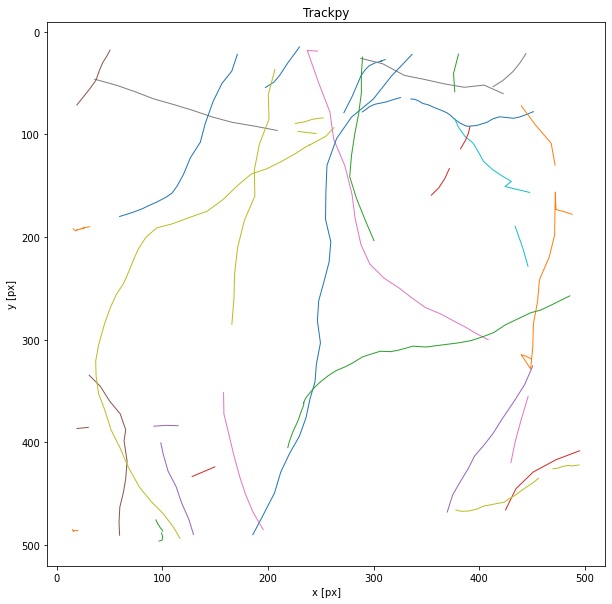

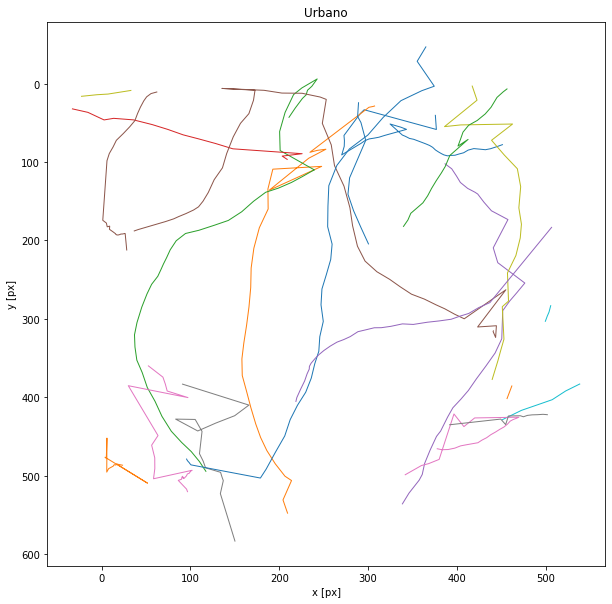

In [76]:
plt.figure()
plt.title('Trackpy')
tp.plot_traj(t);

plt.figure()
plt.title('Urbano')
tp.plot_traj(t_new);
